# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook (delivered as a PDF). Detailed instructions for that assignment are provided in Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

The data that I am using in this project is from FiveThirtyEight. It contains every MLB matchup going back to 1871, the ELO (ratings) of each team for that game adjusted for factors such as pitching, home field advantage, how far a team has to travel etc., and the outcome of that game.

https://github.com/fivethirtyeight/data/tree/master/mlb-elo

<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

I've always been interested in sports with Baseball being my favorite sport growing up and even now. Baseball statistics fascinate me and how they can correlate to the outcome of a game.

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

After initial review of the data, I'd like to see how closely the ELO rating generated corresponds to the outcome of the game. I want to see how often it is correct, how often it is incorrect, and possibly how the spread (difference between winning and losing team runs) correlates to the difference in ELO rating before the game. Since the date range of the data goes back all the way to 1871 I'd like to also possibly explore how ELO rating may be more or less effective in different decades since baseball has changed significantly in the ruleset since 1871.

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [3]:
import pandas as pd

mlb_elo = pd.read_csv(r'mlb_elo.csv')

<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [7]:
mlb_elo.info()

mlb_elo_head = mlb_elo.head()
mlb_elo_tail = mlb_elo.tail()

print(mlb_elo_head)
print(mlb_elo_tail)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220946 entries, 0 to 220945
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          220946 non-null  object 
 1   season        220946 non-null  int64  
 2   neutral       220946 non-null  int64  
 3   playoff       1655 non-null    object 
 4   team1         220946 non-null  object 
 5   team2         220946 non-null  object 
 6   elo1_pre      220946 non-null  float64
 7   elo2_pre      220946 non-null  float64
 8   elo_prob1     220946 non-null  float64
 9   elo_prob2     220946 non-null  float64
 10  elo1_post     220934 non-null  float64
 11  elo2_post     220934 non-null  float64
 12  rating1_pre   220946 non-null  float64
 13  rating2_pre   220946 non-null  float64
 14  pitcher1      220900 non-null  object 
 15  pitcher2      220900 non-null  object 
 16  pitcher1_rgs  187197 non-null  float64
 17  pitcher2_rgs  187197 non-null  float64
 18  pitc

<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

In [1]:
# load up modules
import pandas as pd
import numpy as np
# load for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

1) What I hope to learn from this data is how closely a team's elo rating and FiveThirtyEight rating correlates with the outcome of the game. In the data there is an elo rating for each team before the game is played, the probability of each team winning based on their elo, then the outcome of the game. There is also an adjusted rating created by FiveThirtyEight which takes into additional factors such as pre-season projections and starting pitchers.

2) I believe the data will reveal that a majority of the time the team with the higher rating will win. I also believe that the FiveThirtyEight method of adding additional factors to the rating will be more accurate in determining outcomes.

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

1) The population is every major league baseball game played from 1871 until present.

2) The total sample size is 220,946 games 

In [5]:
mlb_elo.shape

(220946, 26)

<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

The data was collected from the outcome of each major league baseball game played since 1871. It contains the full population of all major league baseball games played during this time period.

<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

Date (object) - Date the game was played <br/>
Season (int) - Season the game was played <br/>
Neutral (int) - Indicates if the game was played at a neutral location, 1 if yes, 0 if no <br/>
Playoff (object) - Indicates if the game was a playoff game, null value if not playoff game <br/>
Team 1 (object) - Home team <br/>
Team 2 (object) - Away team <br/>
elo1_pre (float) - Elo rating of the home team before the game <br/>
elo2_pre (float) - Elo rating of the away team before the game <br/>
elo_prob1 (float) - Probability of the home team winning based on their elo rating <br/>
elo_prob2 (float) - Probability of the away team winning based on their elo rating <br/>
elo1_post (float) - Elo rating of the home team after the game <br/>
elo2_post (float) - Elo rating of the away team after the game <br/>
rating1_pre (float) - FiveThirtyEight rating of the home team before the game <br/>
rating2_pre (float) - FiveThirtyEight rating of the away team before the game <br/>
pitcher1 (object) - Name of the home team pitcher <br/>
pitcher2 (object) - Name of the away team pitcher <br/>
pitcher1_rgs (float) - Rating of the home team pitcher <br/>
pitcher2_rgs (float) - Rating of the away team pitcher <br/>
pitcher1_adj (float) - Home team pitcher adjustment to team rating <br/>
pitcher2_adj (float) - Away team pitcher adjustment to team rating <br/>
rating_prob1 (float) - Probability of the home team winning based on their FiveThirtyEight rating <br/>
rating_prob2 (float) - Probability of the away team winning based on their FiveThirtyEight rating <br/>
rating1_post (float) - FiveThirtyEight rating of the home team after the game <br/>
rating2_post (float) - FiveThirtyEight rating of the away team after the game <br/>
score1 (float) - Score of the home team for the game <br/>
score2 (float) - Score of the away team for the game <br/>
<br/>
<br/>
The variables I will be starting with will be Season, Team 1, Team 2, elo1_pre, elo2_pre, elo_prob1, elo_prob2, rating1_pre, rating2_pre, rating_prob1, rating_prob2, score1, score2. 

<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

In [9]:
mlb_elo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220946 entries, 0 to 220945
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          220946 non-null  object 
 1   season        220946 non-null  int64  
 2   neutral       220946 non-null  int64  
 3   playoff       1655 non-null    object 
 4   team1         220946 non-null  object 
 5   team2         220946 non-null  object 
 6   elo1_pre      220946 non-null  float64
 7   elo2_pre      220946 non-null  float64
 8   elo_prob1     220946 non-null  float64
 9   elo_prob2     220946 non-null  float64
 10  elo1_post     220934 non-null  float64
 11  elo2_post     220934 non-null  float64
 12  rating1_pre   220946 non-null  float64
 13  rating2_pre   220946 non-null  float64
 14  pitcher1      220900 non-null  object 
 15  pitcher2      220900 non-null  object 
 16  pitcher1_rgs  187197 non-null  float64
 17  pitcher2_rgs  187197 non-null  float64
 18  pitc

In [20]:
# Removing playoff games
mlb_playoff = mlb_elo[mlb_elo.playoff.notnull()]
mlb_elo = mlb_elo.drop(mlb_playoff.index)

1655 rows were deleted 

In [24]:
mlb_elo.shape
mlb_elo.info()

(219291, 26)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219291 entries, 38 to 220945
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          219291 non-null  object 
 1   season        219291 non-null  int64  
 2   neutral       219291 non-null  int64  
 3   playoff       0 non-null       object 
 4   team1         219291 non-null  object 
 5   team2         219291 non-null  object 
 6   elo1_pre      219291 non-null  float64
 7   elo2_pre      219291 non-null  float64
 8   elo_prob1     219291 non-null  float64
 9   elo_prob2     219291 non-null  float64
 10  elo1_post     219291 non-null  float64
 11  elo2_post     219291 non-null  float64
 12  rating1_pre   219291 non-null  float64
 13  rating2_pre   219291 non-null  float64
 14  pitcher1      219253 non-null  object 
 15  pitcher2      219253 non-null  object 
 16  pitcher1_rgs  185550 non-null  float64
 17  pitcher2_rgs  185550 non-null  float64
 18  pit

In [32]:
# Removing neutral games
mlb_neutral = mlb_elo[mlb_elo.neutral > 0]
mlb_elo = mlb_elo.drop(mlb_neutral.index)

31 Neutral games were removed

In [33]:
mlb_elo.shape
mlb_elo.info()

(219260, 26)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219260 entries, 38 to 220945
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          219260 non-null  object 
 1   season        219260 non-null  int64  
 2   neutral       219260 non-null  int64  
 3   playoff       0 non-null       object 
 4   team1         219260 non-null  object 
 5   team2         219260 non-null  object 
 6   elo1_pre      219260 non-null  float64
 7   elo2_pre      219260 non-null  float64
 8   elo_prob1     219260 non-null  float64
 9   elo_prob2     219260 non-null  float64
 10  elo1_post     219260 non-null  float64
 11  elo2_post     219260 non-null  float64
 12  rating1_pre   219260 non-null  float64
 13  rating2_pre   219260 non-null  float64
 14  pitcher1      219222 non-null  object 
 15  pitcher2      219222 non-null  object 
 16  pitcher1_rgs  185519 non-null  float64
 17  pitcher2_rgs  185519 non-null  float64
 18  pit

In [40]:
# Dropping unused columns
col_to_drop = ['date','neutral','playoff','elo1_post',
            'elo2_post', 'pitcher1', 'pitcher2','pitcher1_rgs', 'pitcher2_rgs', 'pitcher1_adj', 
              'pitcher2_adj', 'rating1_post', 'rating2_post']

mlb_data = mlb_elo.drop(columns=col_to_drop, inplace=False)
mlb_data.info()
mlb_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219260 entries, 38 to 220945
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   season        219260 non-null  int64  
 1   team1         219260 non-null  object 
 2   team2         219260 non-null  object 
 3   elo1_pre      219260 non-null  float64
 4   elo2_pre      219260 non-null  float64
 5   elo_prob1     219260 non-null  float64
 6   elo_prob2     219260 non-null  float64
 7   rating1_pre   219260 non-null  float64
 8   rating2_pre   219260 non-null  float64
 9   rating_prob1  219260 non-null  float64
 10  rating_prob2  219260 non-null  float64
 11  score1        219260 non-null  float64
 12  score2        219260 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 23.4+ MB


,season,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,rating_prob1,rating_prob2,score1,score2
count,219260.000000,219260.00000,219260.000000,219260.000000,219260.000000,219260.000000,219260.000000,219260.000000,219260.000000,219260.000000,219260.000000
mean,1962.292890,1503.43328,1503.022849,0.534222,0.465778,1503.432459,1503.029222,0.534748,0.465252,4.656216,4.412483
std,40.115194,37.72781,37.884751,0.077516,0.077516,37.993069,38.147329,0.078973,0.078973,3.286769,3.249620
min,1871.000000,1347.36700,1334.931000,0.206134,0.177449,1347.527000,1335.004000,0.203695,0.177482,0.000000,0.000000
25%,1929.000000,1478.73750,1478.470000,0.482827,0.413142,1478.740750,1478.452750,0.482239,0.411622,2.000000,2.000000
50%,1970.000000,1505.31800,1504.960000,0.535097,0.464903,1505.426000,1505.135000,0.535749,0.464251,4.000000,4.000000
75%,1997.000000,1529.16400,1528.725666,0.586858,0.517173,1529.106250,1528.728000,0.588378,0.517761,6.000000,6.000000
max,2020.000000,1656.63600,1657.986000,0.822551,0.793866,1658.006000,1659.344000,0.822518,0.796305,38.000000,49.000000


In [79]:
# checking for duplicate rows by multiplying the elo ratings together and the scores of the game plus 1 to normalize for 0 run games
# This should remove instances where the home team had the elo in two rows but the away team had different elo ratings
check_dup = mlb_data["elo1_pre"] * mlb_data["elo2_pre"] * (mlb_data["score1"] + 1) * (mlb_data["score2"] + 1)
check_dup.nunique()

mlb_data["combined_elo"] = check_dup

duplicated = mlb_data[mlb_data.duplicated(subset="combined_elo", keep=False)]

duplicated

219258

,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,rating_prob1,rating_prob2,score1,score2,combined_elo
71936,1990,CIN,SDP,1507.314,1531.023,0.500419,0.499581,1507.746,1530.270,0.501271,0.498729,2.0,1.0,1.384639e+07
201058,1901,OAK,MIN,1450.000,1450.000,0.534484,0.465516,1450.000,1450.000,0.539645,0.460355,1.0,5.0,2.523000e+07
210584,1890,BR4,SR2,1450.000,1450.000,0.534484,0.465516,1450.000,1450.000,0.534484,0.465516,2.0,3.0,2.523000e+07
210818,1889,PHI,CHC,1507.314,1531.023,0.500419,0.499581,1507.263,1531.056,0.503142,0.496858,1.0,2.0,1.384639e+07


Looks like there are no duplicate rows in the data set

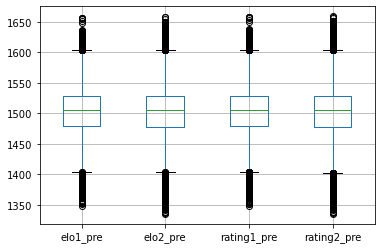

In [80]:
column = ['elo1_pre', 'elo2_pre', 'rating1_pre', 'rating2_pre']

mlb_data.boxplot(column)

According to the boxplot there are outliers on both ends of the spectrum. Looking at the data, however, I do not believe that these values need to be removed. The goal of the rating system is to use 1500 as the "average" and with 150 years of data we would expect the majority of ratings to be within this range, which is why the mean is really close to 1500 in all 4 cases and the standard deviation is low. Teams that fall on the high side or low side of the spectrum most likely just had historic seasons (ex. if the average team wins 80 games a season, there are seasons where a team wins 40 games like the Tigers, or 116 games like the Mariners).

In [81]:
mlb_data.to_csv('mlb_data_final.csv',index=False)

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

In [118]:
mlb_data_final = pd.read_csv(r'mlb_data_final.csv')

In [119]:
mlb_data_final.head()

,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,rating_prob1,rating_prob2,score1,score2,combined_elo
0,2020,STL,MIL,1516.773757,1506.020198,0.549848,0.450152,1510.484379,1510.752482,0.506401,0.493599,5.0,2.0,4.111725e+07
1,2020,TBD,PHI,1559.364855,1499.372724,0.618573,0.381427,1555.643173,1500.011502,0.509891,0.490109,5.0,0.0,1.402841e+07
2,2020,OAK,SEA,1546.342522,1481.520293,0.625112,0.374888,1530.241049,1456.179500,0.571679,0.428321,6.0,2.0,4.810969e+07
3,2020,MIN,CIN,1540.516532,1498.348865,0.594088,0.405912,1551.662577,1517.744869,0.546466,0.453534,3.0,5.0,5.539755e+07
4,2020,LAD,ANA,1593.707374,1481.539764,0.686508,0.313492,1602.267866,1494.058674,0.652045,0.347955,5.0,0.0,1.416685e+07


In [120]:
mlb_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219260 entries, 0 to 219259
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   season        219260 non-null  int64  
 1   team1         219260 non-null  object 
 2   team2         219260 non-null  object 
 3   elo1_pre      219260 non-null  float64
 4   elo2_pre      219260 non-null  float64
 5   elo_prob1     219260 non-null  float64
 6   elo_prob2     219260 non-null  float64
 7   rating1_pre   219260 non-null  float64
 8   rating2_pre   219260 non-null  float64
 9   rating_prob1  219260 non-null  float64
 10  rating_prob2  219260 non-null  float64
 11  score1        219260 non-null  float64
 12  score2        219260 non-null  float64
 13  combined_elo  219260 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 23.4+ MB


In [121]:
# dropping combined elo which was only used to find duplicates in the data and won't be used for analysis

mlb_data_final = mlb_data_final.drop(columns='combined_elo', inplace=False)

In [176]:
# Adding in a column for decade to see if our prediction performance varies during different decades.

decade = np.floor(mlb_data_final['season'] / 10) * 10
mlb_data_final['decade'] = decade

SyntaxError: invalid syntax (<ipython-input-176-ddd8402f77dd>, line 4)

In [123]:
mlb_data_final.head()

,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,rating_prob1,rating_prob2,score1,score2,decade
0,2020,STL,MIL,1516.773757,1506.020198,0.549848,0.450152,1510.484379,1510.752482,0.506401,0.493599,5.0,2.0,2020.0
1,2020,TBD,PHI,1559.364855,1499.372724,0.618573,0.381427,1555.643173,1500.011502,0.509891,0.490109,5.0,0.0,2020.0
2,2020,OAK,SEA,1546.342522,1481.520293,0.625112,0.374888,1530.241049,1456.179500,0.571679,0.428321,6.0,2.0,2020.0
3,2020,MIN,CIN,1540.516532,1498.348865,0.594088,0.405912,1551.662577,1517.744869,0.546466,0.453534,3.0,5.0,2020.0
4,2020,LAD,ANA,1593.707374,1481.539764,0.686508,0.313492,1602.267866,1494.058674,0.652045,0.347955,5.0,0.0,2020.0


In [124]:
# adding in a column for the winning team
 
score1 = mlb_data_final['score1']
score2 = mlb_data_final['score2']

# score final is positive if the home team wins, negative if the away team wins, and 0 if tied

score_final = score1 - score2
winning_team = []
    
for i in score_final:
    
    if (i > 0):
        result = 'Home'
    elif (i < 0):
        result = 'Away'
    else:
        result = 'Tie'
    winning_team.append(result)
    
mlb_data_final['winning team'] = winning_team
    

Upon reviewing the data I initially was going to use the raw elo and ratings to determine which team was predicted to win, but after further reviewing the data there are times where a team has a higher rating but a lower probability to win. Since the goal of the analysis is to see how accurate the FiveThirtyEight probabilities were, I chose to use the probability columns for both elo and rating as opposed to raw rating.

In [125]:
# adding in a column for the elo prediction based on elo probability
 
elo1 = mlb_data_final['elo_prob1']
elo2 = mlb_data_final['elo_prob2']

# elo final is positive if the home team wins, negative if the away team wins, and 0 if tied

elo_final = elo1 - elo2
elo_prediction = []
    
for i in elo_final:
    
    if (i > 0):
        result = 'Home'
    elif (i < 0):
        result = 'Away'
    else:
        result = 'Tie'
    elo_prediction.append(result)   
    
mlb_data_final['elo prediction'] = elo_prediction
    

In [126]:
#adding in a column for the rating prediction based on rating probability
 
rating1 = mlb_data_final['rating_prob1']
rating2 = mlb_data_final['rating_prob2']

#rating final is positive if the home team wins, negative if the away team wins, and 0 if tied

rating_final = rating1 - rating2
rating_prediction = []
    
for i in rating_final:
    
    if (i > 0):
        result = 'Home'
    elif (i < 0):
        result = 'Away'
    else:
        result = 'Tie'
    rating_prediction.append(result)
    
mlb_data_final['rating prediction'] = rating_prediction
    

In [127]:
mlb_data_final.head(15)


,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,rating_prob1,rating_prob2,score1,score2,decade,winning team,elo prediction,rating prediction
0,2020,STL,MIL,1516.773757,1506.020198,0.549848,0.450152,1510.484379,1510.752482,0.506401,0.493599,5.0,2.0,2020.0,Home,Home,Home
1,2020,TBD,PHI,1559.364855,1499.372724,0.618573,0.381427,1555.643173,1500.011502,0.509891,0.490109,5.0,0.0,2020.0,Home,Home,Home
2,2020,OAK,SEA,1546.342522,1481.520293,0.625112,0.374888,1530.241049,1456.179500,0.571679,0.428321,6.0,2.0,2020.0,Home,Home,Home
3,2020,MIN,CIN,1540.516532,1498.348865,0.594088,0.405912,1551.662577,1517.744869,0.546466,0.453534,3.0,5.0,2020.0,Away,Home,Home
4,2020,LAD,ANA,1593.707374,1481.539764,0.686508,0.313492,1602.267866,1494.058674,0.652045,0.347955,5.0,0.0,2020.0,Home,Home,Home
5,2020,CLE,PIT,1524.284153,1448.975848,0.639147,0.360853,1532.694921,1449.556461,0.557560,0.442440,8.0,6.0,2020.0,Home,Home,Home
6,2020,CHW,CHC,1507.188963,1520.481966,0.515404,0.484596,1516.163966,1523.620069,0.519053,0.480947,8.0,10.0,2020.0,Away,Home,Home
7,2020,ATL,BOS,1543.997526,1492.698052,0.606699,0.393301,1540.879538,1488.445342,0.579033,0.420967,1.0,9.0,2020.0,Away,Home,Home
8,2020,ARI,COL,1493.325947,1468.639104,0.569611,0.430389,1497.130952,1475.960453,0.524518,0.475482,11.0,3.0,2020.0,Home,Home,Home
9,2020,TOR,BAL,1503.406368,1464.088215,0.590127,0.409873,1492.478945,1434.391940,0.550945,0.449055,5.0,7.0,2020.0,Away,Home,Home


In [128]:
# adding in a column for if the elo prediction is correct
 
winner = mlb_data_final['winning team']
elo_winner = mlb_data_final['elo prediction']

elo_performance = []

# returns a 1 if the prediction is correct, 0 if it is incorrect
    
for (a, b) in zip(winner, elo_winner):
    
    if (a == b):
        result = 1
    else:
        result = 0
    elo_performance.append(result)
    
mlb_data_final['elo performance'] = elo_performance

In [129]:
# adding in a column for if the rating prediction is correct
 
winner = mlb_data_final['winning team']
rating_winner = mlb_data_final['rating prediction']

rating_performance = []

# returns a 1 if the prediction is correct, 0 if it is incorrect
    
for (a, b) in zip(winner, rating_winner):
    
    if (a == b):
        result = 1
    else:
        result = 0
    rating_performance.append(result)
    
mlb_data_final['rating performance'] = rating_performance

In [135]:
# adding in a column to see if the predictions are the same
 
elo_prediction1 = mlb_data_final['elo prediction']
rating_prediction1 = mlb_data_final['rating prediction']

same_prediction = []

# returns a 1 if the values are the same, 0 if the values are different
    
for (a, b) in zip(elo_prediction1, rating_prediction1):
    
    if (a == b):
        result = 1
    else:
        result = 0
    same_prediction.append(result)
    
mlb_data_final['same prediction'] = same_prediction

In [136]:
mlb_data_final.head()
mlb_data_final.info()

,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,rating_prob1,rating_prob2,score1,score2,decade,winning team,elo prediction,rating prediction,elo performance,rating performance,same prediction
0,2020,STL,MIL,1516.773757,1506.020198,0.549848,0.450152,1510.484379,1510.752482,0.506401,0.493599,5.0,2.0,2020.0,Home,Home,Home,1,1,1
1,2020,TBD,PHI,1559.364855,1499.372724,0.618573,0.381427,1555.643173,1500.011502,0.509891,0.490109,5.0,0.0,2020.0,Home,Home,Home,1,1,1
2,2020,OAK,SEA,1546.342522,1481.520293,0.625112,0.374888,1530.241049,1456.179500,0.571679,0.428321,6.0,2.0,2020.0,Home,Home,Home,1,1,1
3,2020,MIN,CIN,1540.516532,1498.348865,0.594088,0.405912,1551.662577,1517.744869,0.546466,0.453534,3.0,5.0,2020.0,Away,Home,Home,0,0,1
4,2020,LAD,ANA,1593.707374,1481.539764,0.686508,0.313492,1602.267866,1494.058674,0.652045,0.347955,5.0,0.0,2020.0,Home,Home,Home,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219260 entries, 0 to 219259
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   season              219260 non-null  int64  
 1   team1               219260 non-null  object 
 2   team2               219260 non-null  object 
 3   elo1_pre            219260 non-null  float64
 4   elo2_pre            219260 non-null  float64
 5   elo_prob1           219260 non-null  float64
 6   elo_prob2           219260 non-null  float64
 7   rating1_pre         219260 non-null  float64
 8   rating2_pre         219260 non-null  float64
 9   rating_prob1        219260 non-null  float64
 10  rating_prob2        219260 non-null  float64
 11  score1              219260 non-null  float64
 12  score2              219260 non-null  float64
 13  decade              219260 non-null  float64
 14  winning team        219260 non-null  object 
 15  elo prediction      219260 non-nul

<br>
<br>
<br>
<br>
<br>
<h2>Hypothesis: Due to the fact that the FiveThirtyEight rating system includes factors such as starting pitcher for the game, I believe it will be more accurate than a basic elo rating in predicting the correct winner of the game</h2>
<br>
<br>
<br>
<br>
<br>

In [139]:
# defining variables to calculate overall % correct

elo_count = mlb_data_final['elo performance'].count()
elo_correct = sum(mlb_data_final['elo performance'])

rating_count = mlb_data_final['rating performance'].count()
rating_correct = sum(mlb_data_final['rating performance'])

same_prediction_count = mlb_data_final['same prediction'].count()
same_prediction_correct = sum(mlb_data_final['same prediction'])

In [157]:
# comparing initial accuracy of the prediction methods

elo_percent_correct = elo_correct / elo_count
rating_percent_correct = rating_correct / rating_count

print(f'The overall Elo Percentage correct is: {elo_percent_correct * 100:.2f}%')
print(f'The overall Rating Percentage correct is: {rating_percent_correct * 100:.2f}%')

if rating_percent_correct > elo_percent_correct:
    print(f'The overall Rating Percentage is {(rating_percent_correct - elo_percent_correct)*10000:.0f} basis points better than the overall Elo Percentage')
else:
    print(f'The overall Elo Percentage is {(elo_percent_correct - rating_percent_correct)*10000:.0f} basis points better than the overall Rating Percentage')

The overall Elo Percentage correct is: 57.49%
The overall Rating Percentage correct is: 57.55%
The overall Rating Percentage is 5 basis points better than the overall Elo Percentage


The inital high level analysis shows that our hypothesis is correct, but the margin is very low. Next we will take a look at if this differs by decade

In [191]:
mlb_decades_sum = mlb_data_final.groupby(by='decade').sum()
mlb_decades_count = mlb_data_final.groupby(by='decade').count()

mlb_decades_elo_correct = mlb_decades_sum['elo performance'] / mlb_decades_count['elo performance']
mlb_decades_rating_correct = mlb_decades_sum['rating performance'] / mlb_decades_count['rating performance']
mlb_decades_difference = mlb_decades_rating_correct - mlb_decades_elo_correct

mlb_decades_elo_correct * 100
mlb_decades_rating_correct * 100
mlb_decades_difference * 10000

decade
1870.0    66.108374
1880.0    61.937342
1890.0    61.293210
1900.0    59.742550
1910.0    57.900836
1920.0    58.183884
1930.0    59.337178
1940.0    58.653846
1950.0    58.509779
1960.0    56.794687
1970.0    56.548521
1980.0    54.821262
1990.0    55.557099
2000.0    56.640593
2010.0    56.298677
2020.0    55.902004
Name: elo performance, dtype: float64

decade
1870.0    65.960591
1880.0    61.925339
1890.0    61.315583
1900.0    59.733733
1910.0    57.751842
1920.0    58.273148
1930.0    59.296564
1940.0    58.605365
1950.0    58.485534
1960.0    56.894931
1970.0    56.619206
1980.0    54.663913
1990.0    55.483005
2000.0    56.644710
2010.0    56.916801
2020.0    57.126949
Name: rating performance, dtype: float64

decade
1870.0    -14.778325
1880.0     -1.200336
1890.0      2.237387
1900.0     -0.881679
1910.0    -14.899429
1920.0      8.926398
1930.0     -4.061408
1940.0     -4.848093
1950.0     -2.424438
1960.0     10.024435
1970.0      7.068565
1980.0    -15.734867
1990.0     -7.409466
2000.0      0.411692
2010.0     61.812338
2020.0    122.494432
dtype: float64

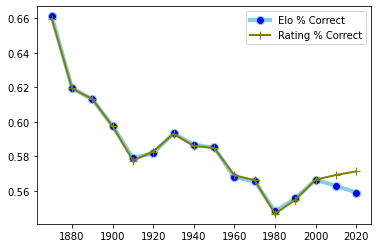

In [196]:
y1 = mlb_decades_elo_correct
y2 = mlb_decades_rating_correct


plt.plot(y1, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4, label='Elo % Correct')
plt.plot(y2, marker='+', markerfacecolor='olive', markersize=8, color='olive', linewidth=2, label='Rating % Correct')
plt.legend()

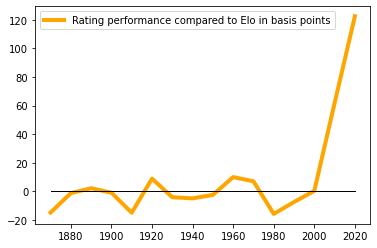

In [199]:
y3 = mlb_decades_difference * 10000
y4 = mlb_decades_difference * 0

plt.plot(y3, color='orange', linewidth=4, label='Rating performance compared to Elo in basis points')
plt.plot(y4, color='black', linewidth=1)
plt.legend()

We see that the difference between elo and rating historically has been next to nothing, but since the decade 2000 the rating has outperformed the elo. Next we will focus on only the decades 2000, 2010, and 2020.

In [194]:
mlb_data_focus = mlb_data_final[mlb_data_final['decade'] >= 2000]
mlb_data_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49455 entries, 0 to 49454
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              49455 non-null  int64  
 1   team1               49455 non-null  object 
 2   team2               49455 non-null  object 
 3   elo1_pre            49455 non-null  float64
 4   elo2_pre            49455 non-null  float64
 5   elo_prob1           49455 non-null  float64
 6   elo_prob2           49455 non-null  float64
 7   rating1_pre         49455 non-null  float64
 8   rating2_pre         49455 non-null  float64
 9   rating_prob1        49455 non-null  float64
 10  rating_prob2        49455 non-null  float64
 11  score1              49455 non-null  float64
 12  score2              49455 non-null  float64
 13  decade              49455 non-null  float64
 14  winning team        49455 non-null  object 
 15  elo prediction      49455 non-null  object 
 16  rati

We will now look at performance by season starting with 2000

In [195]:
mlb_seasons_sum = mlb_data_focus.groupby(by='season').sum()
mlb_seasons_count = mlb_data_focus.groupby(by='season').count()

mlb_seasons_elo_correct = mlb_seasons_sum['elo performance'] / mlb_seasons_count['elo performance']
mlb_seasons_rating_correct = mlb_seasons_sum['rating performance'] / mlb_seasons_count['rating performance']
mlb_seasons_difference = mlb_seasons_rating_correct - mlb_seasons_elo_correct

mlb_seasons_elo_correct * 100
mlb_seasons_rating_correct * 100
mlb_seasons_difference * 10000

season
2000    56.878089
2001    55.249074
2002    58.202803
2003    57.818930
2004    57.825371
2005    56.643357
2006    55.907781
2007    55.573838
2008    55.518946
2009    56.790123
2010    56.613103
2011    56.154796
2012    56.589786
2013    56.026327
2014    55.024712
2015    54.672705
2016    54.676555
2017    56.229373
2018    57.608247
2019    59.404713
2020    55.902004
Name: elo performance, dtype: float64

season
2000    56.425041
2001    55.290243
2002    58.120363
2003    57.818930
2004    57.125206
2005    56.314274
2006    55.825443
2007    56.273139
2008    56.301483
2009    56.954733
2010    55.459415
2011    55.619597
2012    56.466227
2013    58.288770
2014    55.477759
2015    55.290243
2016    56.654306
2017    57.054455
2018    59.010309
2019    59.859446
2020    57.126949
Name: rating performance, dtype: float64

season
2000    -45.304778
2001      4.116921
2002     -8.244023
2003      0.000000
2004    -70.016474
2005    -32.908268
2006     -8.233841
2007     69.930070
2008     78.253707
2009     16.460905
2010   -115.368768
2011    -53.519967
2012    -12.355848
2013    226.244344
2014     45.304778
2015     61.753808
2016    197.775031
2017     82.508251
2018    140.206186
2019     45.473336
2020    122.494432
dtype: float64

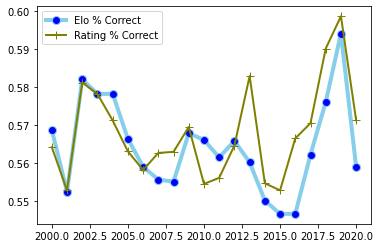

In [197]:
y1 = mlb_seasons_elo_correct
y2 = mlb_seasons_rating_correct


plt.plot(y1, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4, label='Elo % Correct')
plt.plot(y2, marker='+', markerfacecolor='olive', markersize=8, color='olive', linewidth=2, label='Rating % Correct')
plt.legend()

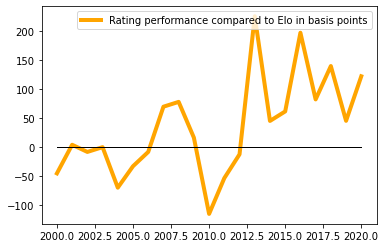

In [200]:
y3 = mlb_seasons_difference * 10000
y4 = mlb_seasons_difference * 0

plt.plot(y3, color='orange', linewidth=4, label='Rating performance compared to Elo in basis points')
plt.plot(y4, color='black', linewidth=1)
plt.legend()

Just focusing on seasons since 2000, we see that both methods of predicting the outcome are between 55 and 60% correct by season. Starting with the 2012 season, the rating indicator has outperformed the elo indicator by between 50 and 200 basis points per season.

The next part I'm going to look at is performance in games where the elo rating and FiveThirtyEight rating were different.

In [223]:
different_predictions = mlb_data_final[mlb_data_final['same prediction'] == 0]
different_predictions.info()
different_predictions['winning team'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7479 entries, 12 to 219203
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              7479 non-null   int64  
 1   team1               7479 non-null   object 
 2   team2               7479 non-null   object 
 3   elo1_pre            7479 non-null   float64
 4   elo2_pre            7479 non-null   float64
 5   elo_prob1           7479 non-null   float64
 6   elo_prob2           7479 non-null   float64
 7   rating1_pre         7479 non-null   float64
 8   rating2_pre         7479 non-null   float64
 9   rating_prob1        7479 non-null   float64
 10  rating_prob2        7479 non-null   float64
 11  score1              7479 non-null   float64
 12  score2              7479 non-null   float64
 13  decade              7479 non-null   float64
 14  winning team        7479 non-null   object 
 15  elo prediction      7479 non-null   object 
 16  rat

Home    3770
Away    3702
Tie        7
Name: winning team, dtype: int64

There were 7479 games in which the elo prediction and rating prediction were different

In [206]:
# defining variables to calculate % correct for these games

elo_count = different_predictions['elo performance'].count()
elo_correct = sum(different_predictions['elo performance'])

rating_count = different_predictions['rating performance'].count()
rating_correct = sum(different_predictions['rating performance'])

elo_percent_correct = elo_correct / elo_count
rating_percent_correct = rating_correct / rating_count

print(f'In games with different predictions, Elo was correct {elo_percent_correct * 100:.2f}% of the time.')
print(f'In games with different predictions, Rating was correct {rating_percent_correct * 100:.2f}% of the time.')
if elo_percent_correct > rating_percent_correct:
    print(f'The Elo prediction was {(elo_percent_correct - rating_percent_correct) * 10000:.0f} basis points better')
else:
    print(f'The Rating prediction was {(rating_percent_correct - elo_percent_correct) * 10000:.0f} basis points better')

In games with different predictions, Elo was correct 49.15% of the time.
In games with different predictions, Rating was correct 50.76% of the time.
The Rating prediction was 160 basis points better


Let's take a look at how these games break down by decade

In [228]:
mlb_different_sum = different_predictions.groupby(by='decade').sum()
mlb_different_count = different_predictions.groupby(by='decade').count()

mlb_different_elo_correct = mlb_different_sum['elo performance'] / mlb_different_count['elo performance']
mlb_different_rating_correct = mlb_different_sum['rating performance'] / mlb_different_count['rating performance']
mlb_different_difference = mlb_different_rating_correct - mlb_different_elo_correct

mlb_different_elo_correct * 100
mlb_different_rating_correct * 100
mlb_different_difference * 10000

different_predictions[different_predictions['decade'] == 1870]

decade
1870.0    55.000000
1880.0    52.380952
1890.0    47.500000
1900.0    50.909091
1910.0    54.966887
1920.0    46.969697
1930.0    51.366120
1940.0    51.308901
1950.0    50.625000
1960.0    46.992481
1970.0    47.904192
1980.0    53.524229
1990.0    51.379310
2000.0    49.968414
2010.0    47.580645
2020.0    46.153846
Name: elo performance, dtype: float64

decade
1870.0    40.000000
1880.0    47.619048
1890.0    52.500000
1900.0    49.090909
1910.0    43.046358
1920.0    52.525253
1930.0    48.633880
1940.0    48.167539
1950.0    48.750000
1960.0    53.007519
1970.0    52.095808
1980.0    46.475771
1990.0    48.620690
2000.0    50.031586
2010.0    52.419355
2020.0    53.846154
Name: rating performance, dtype: float64

decade
1870.0   -1500.000000
1880.0    -476.190476
1890.0     500.000000
1900.0    -181.818182
1910.0   -1192.052980
1920.0     555.555556
1930.0    -273.224044
1940.0    -314.136126
1950.0    -187.500000
1960.0     601.503759
1970.0     419.161677
1980.0    -704.845815
1990.0    -275.862069
2000.0       6.317119
2010.0     483.870968
2020.0     769.230769
dtype: float64

,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,rating_prob1,rating_prob2,score1,score2,decade,winning team,elo prediction,rating prediction,elo performance,rating performance,same prediction
218189,1875,NY2,PH2,1501.144,1523.670,0.502121,0.497879,1501.571,1523.717,0.496048,0.503952,3.0,14.0,1870.0,Away,Home,Away,0,1,0
218228,1875,CHC,PH2,1494.151,1518.690,0.499224,0.500776,1494.588,1518.700,0.509767,0.490233,0.0,5.0,1870.0,Away,Away,Home,1,0,0
218238,1875,CHC,HR1,1491.160,1515.861,0.498991,0.501009,1491.760,1516.002,0.509580,0.490420,1.0,1.0,1870.0,Tie,Away,Home,0,0,0
218239,1875,SL2,HR1,1490.333,1514.497,0.499764,0.500236,1490.814,1514.636,0.500256,0.499744,0.0,3.0,1870.0,Away,Away,Home,1,0,0
218326,1875,HR1,PH2,1493.205,1517.006,0.500286,0.499714,1492.790,1517.268,0.496002,0.503998,14.0,5.0,1870.0,Home,Home,Away,1,0,0
218368,1875,SL2,HR1,1470.588,1495.014,0.499387,0.500613,1470.579,1494.608,0.503268,0.496732,7.0,1.0,1870.0,Home,Away,Home,0,1,0
218659,1874,BR2,CHC,1440.162,1467.505,0.495189,0.504811,1440.342,1467.650,0.501859,0.498141,3.0,5.0,1870.0,Away,Away,Home,1,0,0
218675,1874,BL1,PH2,1473.032,1503.968,0.490020,0.509980,1475.532,1503.337,0.501144,0.498856,5.0,9.0,1870.0,Away,Away,Home,1,0,0
218694,1874,BL1,NY2,1478.560,1508.604,0.491303,0.508697,1481.206,1509.115,0.500994,0.499006,1.0,8.0,1870.0,Away,Away,Home,1,0,0
218761,1873,PH1,BL1,1515.147,1536.887,0.503252,0.496748,1514.960,1540.480,0.497813,0.502187,13.0,6.0,1870.0,Home,Home,Away,1,0,0


Note: The Elo % correct and Rating % correct don't always add up to 100, you can see in the case of a tie above that neither prediction is correct

<BarContainer object of 16 artists>

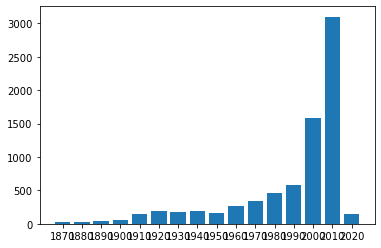

In [232]:
x = ['1870','1880','1890','1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000','2010','2020']

plt.bar(x, mlb_different_count['winning team'])

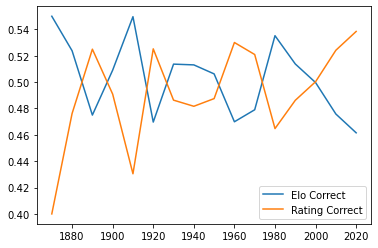

In [237]:
plt.plot(mlb_different_elo_correct, label='Elo Correct')
plt.plot(mlb_different_rating_correct, label='Rating Correct')
plt.legend()

There isn't any noticeable trend by decade for which is better, but we do see that Ratings all time is 160 basis points better and the majority of predictions that were different between the two methods have occurred recently. Let's take a look at the performance by season since 2000 for games where predictions were different.

In [239]:
mlb_data_different_focus = different_predictions[different_predictions['decade'] >= 2000]
mlb_data_different_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4826 entries, 12 to 49451
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              4826 non-null   int64  
 1   team1               4826 non-null   object 
 2   team2               4826 non-null   object 
 3   elo1_pre            4826 non-null   float64
 4   elo2_pre            4826 non-null   float64
 5   elo_prob1           4826 non-null   float64
 6   elo_prob2           4826 non-null   float64
 7   rating1_pre         4826 non-null   float64
 8   rating2_pre         4826 non-null   float64
 9   rating_prob1        4826 non-null   float64
 10  rating_prob2        4826 non-null   float64
 11  score1              4826 non-null   float64
 12  score2              4826 non-null   float64
 13  decade              4826 non-null   float64
 14  winning team        4826 non-null   object 
 15  elo prediction      4826 non-null   object 
 16  rati

In [240]:
mlb_different_seasons_sum = mlb_data_different_focus.groupby(by='season').sum()
mlb_different_seasons_count = mlb_data_different_focus.groupby(by='season').count()

mlb_different_seasons_elo_correct = mlb_different_seasons_sum['elo performance'] / mlb_different_seasons_count['elo performance']
mlb_different_seasons_rating_correct = mlb_different_seasons_sum['rating performance'] / mlb_different_seasons_count['rating performance']
mlb_different_seasons_difference = mlb_different_seasons_rating_correct - mlb_different_seasons_elo_correct

mlb_different_seasons_elo_correct * 100
mlb_different_seasons_rating_correct * 100
mlb_different_seasons_difference * 10000

season
2000    57.746479
2001    49.438202
2002    50.980392
2003    50.000000
2004    56.692913
2005    52.564103
2006    50.526316
2007    46.502058
2008    45.991561
2009    49.305556
2010    55.600000
2011    52.296820
2012    50.488599
2013    41.538462
2014    48.122867
2015    48.051948
2016    43.684211
2017    46.932515
2018    43.511450
2019    48.096886
2020    46.153846
Name: elo performance, dtype: float64

season
2000    42.253521
2001    50.561798
2002    49.019608
2003    50.000000
2004    43.307087
2005    47.435897
2006    49.473684
2007    53.497942
2008    54.008439
2009    50.694444
2010    44.400000
2011    47.703180
2012    49.511401
2013    58.461538
2014    51.877133
2015    51.948052
2016    56.315789
2017    53.067485
2018    56.488550
2019    51.903114
2020    53.846154
Name: rating performance, dtype: float64

season
2000   -1549.295775
2001     112.359551
2002    -196.078431
2003       0.000000
2004   -1338.582677
2005    -512.820513
2006    -105.263158
2007     699.588477
2008     801.687764
2009     138.888889
2010   -1120.000000
2011    -459.363958
2012     -97.719870
2013    1692.307692
2014     375.426621
2015     389.610390
2016    1263.157895
2017     613.496933
2018    1297.709924
2019     380.622837
2020     769.230769
dtype: float64

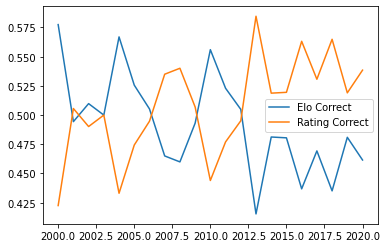

In [242]:
plt.plot(mlb_different_seasons_elo_correct, label='Elo Correct')
plt.plot(mlb_different_seasons_rating_correct, label='Rating Correct')
plt.legend()

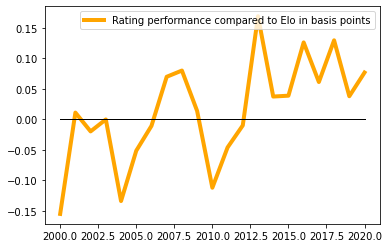

In [244]:
plt.plot(mlb_different_seasons_difference, color='orange', linewidth=4, label='Rating performance compared to Elo in basis points')
plt.plot(mlb_different_seasons_difference*0, color='black', linewidth=1)
plt.legend()

Breaking it down by season since 2000, we see that the FiveThirtyEight Rating Prediction has been significantly more accurate since 2012 which most likely is the reason that since 2012 it is a better overall predictor of baseball game outcomes.